# Data Analysis for Data Analyst Job Landscape 2020

## Goal
There were 2 main motivations for me to do this project,
* (1) Understand the current job market for data centric jobs
* (2) Find out the what employers are looking for in data centric jobs

## Background
The project data analysis occurs in the 3rd section: Exploratory Analysis where I explore various themes that I wanted to understand to fufil my 2 goals that I listed above. I used data visualization to explore the various themes, for ease of understanding and giving me an easy snapshot of the job landscape at this current moment.
<br> The data was pulled from Glassdoor on 22nd May 2020.

## Methodology
* [1. Packages](#point_1)
* [2. Reading Datasets](#point_2)
* [3. Exploratory Analysis](#point_3)
    * [3.1 One Important Caveat](#point_3_1)
    * [3.2 Average Base Pay Comparison Across Job Titles](#point_3_2)
    * [3.3 Number of Jobs listed on Glassdoor](#point_3_3)
    * [3.4 Technical Skills](#point_3_4)
    * [3.5 Academic Skills](#point_3_5)
    * [3.6 Education Level](#point_3_6)
    * [3.7 Job demand by Ownership](#point_3_7)
    * [3.8 Job demand by Industry](#point_3_8)
    * [3.9 Rating Distribution](#point_3_9)
* [4. Word Cloud](#point_4)

## Click button to show/hide code

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<a id = "point_1"> </a>
## 1. Packages
There are various data analysis packages within Python that I'll be using for my anaysis

In [2]:
"""Data Science Packages"""
import pandas as pd
import numpy as np
from scipy.stats import norm
from pandas import DataFrame

"""Data Visualisation Packages"""
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot
from matplotlib.pyplot import figure
import squarify

"""World Cloud"""
import nltk
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

<a id = "point_2"></a>
## 2. Reading Datasets
After performing the Data Cleaning in Part 2, I'm using my clean dataset in this data analysis portion.

In [3]:
print("---------------------- Job Dataset --------------------------")

---------------------- Job Dataset --------------------------


In [4]:
df = pd.read_excel(
    '/Users/James/Documents/GitHub/Data-Analyst-Job-Landscape/Job Titles CSV Files/Job_dataset.xlsx')
df.head()

,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,...,SQL,Calculus,Database Management,Machine Learning,Statistics,DevOps,Bachelors Degreee,Masters,PhD,No Education Specified
0,0,Data Scientist,We are looking for Data Scientists who are int...,3.6,GovTech,Singapore,1001 to 5000 employees,2016,Government,Government Agencies,...,0,0,0,1,0,0,1,0,0,0
1,1,Data Scientist,Location:SingaporeGeography:Asia PacificCapabi...,4.3,Boston Consulting Group,United States,10000+ employees,1963,Company - Private,Consulting,...,0,0,0,1,0,1,1,0,1,1
2,2,Data Scientist,Data ScientistSingaporeDell provides the techn...,4.1,Dell Technologies,United States,10000+ employees,1984,Company - Public,IT Services,...,1,0,0,1,0,0,0,0,0,0
3,3,Data Scientist,The Dash Replenishment Service (DRS) is an inn...,4.1,Amazon,United States,10000+ employees,1994,Company - Public,Internet,...,1,0,0,0,0,0,1,0,0,0
4,4,Data Scientist,AnalyticsData Scientist - QuantumBlackSingapor...,4.1,QuantumBlack,United Kingdom,501 to 1000 employees,2009,Company - Private,Consulting,...,1,0,0,1,1,0,0,0,1,1


In [5]:
# Lisiting all the columns that are in the csv file
df.columns

Index(['Unnamed: 0', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Seniority', 'AWS', 'Excel', 'Python', 'R',
       'Spark', 'Hadoop', 'Scala', 'SQL', 'Calculus', 'Database Management',
       'Machine Learning', 'Statistics', 'DevOps', 'Bachelors Degreee',
       'Masters', 'PhD', 'No Education Specified'],
      dtype='object')

In [6]:
print("---------------------- Salary Dataset --------------------------")

---------------------- Salary Dataset --------------------------


In [7]:
salary_df = pd.read_excel(
    '/Users/James/Documents/GitHub/Data-Analyst-Job-Landscape/Job Titles CSV Files/Salary by title.xlsx')
salary_df

,Unnamed: 0,Job Title,Position Level,Average Base Pay,Number of Respondents,Number of Listed Jobs
0,0,Data Scientist,Senior,118000,4,928
1,1,Data Scientist,Junior,52200,3,568
2,2,Data Engineer,Senior,78000,4,1051
3,3,Data Engineer,Junior,48000,1,4334
4,4,Data Analyst,Senior,57600,12,923
5,5,Data Analyst,Junior,51800,33,252
6,6,Technology Consultant,Senior,84000,1,821
7,7,Technology Consultant,Junior,75600,9,1902
8,8,Quantitative Analyst,Junior,120000,9,512
9,9,Machine Learning Engineer,Junior,68400,8,723


<a id = "point_3"></a>
## 3. Exploratory Analysis

<a id = "point_3_1"></a>
### 3.1 One Important Caveat

An Important Caveat I would like to make which I believe is important to address before I begin my Exploratory Analysis is how representative the salary statistics I gathered is. As I have outputted in Section 2, it can be seen that the number of respondents for the Glassdoor Singapore Data related jobs is the extremely small sample size that is available. Therefore, it's important to note that this results is an indication and estimated for us to have a better understanding of the current salaries in this industry but should not be taken as the **yardstick**.

<br> Looking at other resources available, I have found that Glassdoor was my choice website to obtain my data despite the limitations due to its unbiasness which I deemed as an important element of this project.

<a id = "point_3_2"></a>
### 3.2 Average Base Pay Comparison Across Job Titles
We want to compare the average base pay for the different job titles. And within the job titles, if there's any deviations in salary for the level of seniority. 

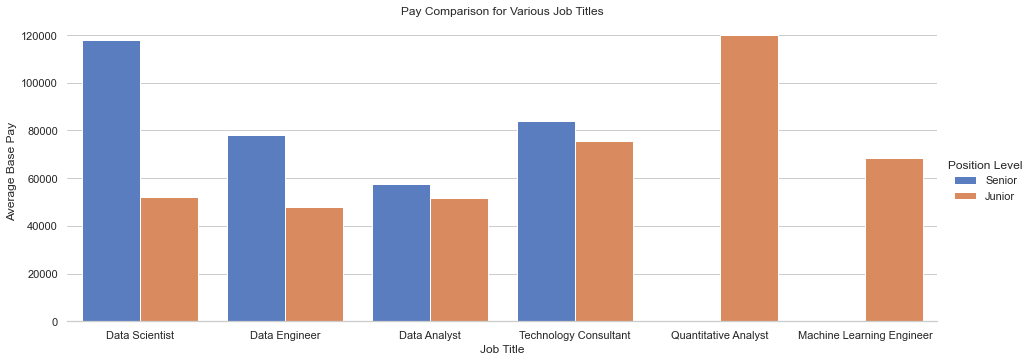

In [8]:
sns.set(style="whitegrid")

fig = sns.catplot(x="Job Title", y="Average Base Pay", hue="Position Level", data=salary_df,
                  kind="bar", palette="muted", aspect=8/3)
fig.despine(left=True)
fig.set_ylabels("Average Base Pay")
fig.set(title="Pay Comparison for Various Job Titles")
fig.savefig("Average Base Pay Comparison Across Job Titles.png")

**Findings:** The salary plot allows us to see that the best paid position is as a Quantitative Analyst, followed closely by the Senior Data Scientist and Senior Technology Consultant.
<br> For fresh graduates, the expected pay for the Data Scientist/Engineer/Analyst role is **S\\$ 50666 /year or S\\$ 4222 /month**.

<a id = "point_3_3"></a>
### 3.3 Number of Jobs listed on Glassdoor
We want to compare across the different job titles how many avaialbe positions are there listed on Glassdoor.

In [9]:
df_jobs_available = df['Job Title'].value_counts().rename_axis(
    'Job Title').reset_index(name='Number of Jobs')

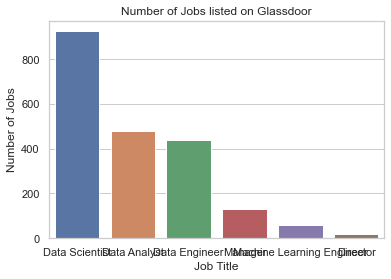

In [10]:
sns.set(style="whitegrid")
sns_plot = sns.barplot(x="Job Title", y="Number of Jobs", data=df_jobs_available).set_title(
    'Number of Jobs listed on Glassdoor')
sns.set(rc={'figure.figsize': (16, 8)})
sns_plot.figure.savefig("Number of Jobs listed on Glassdoor.png")

In [11]:
df_jobs_available

,Job Title,Number of Jobs
0,Data Scientist,925
1,Data Analyst,477
2,Data Engineer,440
3,Manager,129
4,Machine Learning Engineer,61
5,Director,17


**Findings:** We found that the Data Scientist job title has the most number of jobs available by a large margin with 925 jobs. Followed by Data Analyst and Data Engineer with 477 and 440 jobs postings respectively.
<br> Surprisingly, there were more managerial positions for the Data Driven jobs compared to machine learning engineer. 

<a id = "point_3_4"></a>
### 3.4 Technical Skills
The technology industry is heavily dependent on the proficiency of the technical skill sets. Therefore, I searched through the Job Description and pulled out the technical skills requested by companies.
<br> Methodology: I searched through the job description and pull the top 8 most mentioned technical skillset. There are 2 representations which are (1) Dataframe and (2) Histogram.

In [12]:
# Creating dictionary counting the number of times a particular technical skill is called
technical_skills = ['AWS', 'Excel', 'Python',
                    'R', 'Spark', 'Hadoop', 'Scala', 'SQL']
adict = {}
for every_skill in technical_skills:
    that_sum = df[every_skill].sum()
    adict[every_skill] = that_sum

print(adict)

{'AWS': 328, 'Excel': 763, 'Python': 1351, 'R': 159, 'Spark': 629, 'Hadoop': 531, 'Scala': 509, 'SQL': 1193}


In [13]:
# Representing these numbers with a dataframe
df_technical_skill = DataFrame(list(adict.items()), columns=[
                               'Technical Skills', 'Frequency'])
df_technical_skill

,Technical Skills,Frequency
0,AWS,328
1,Excel,763
2,Python,1351
3,R,159
4,Spark,629
5,Hadoop,531
6,Scala,509
7,SQL,1193


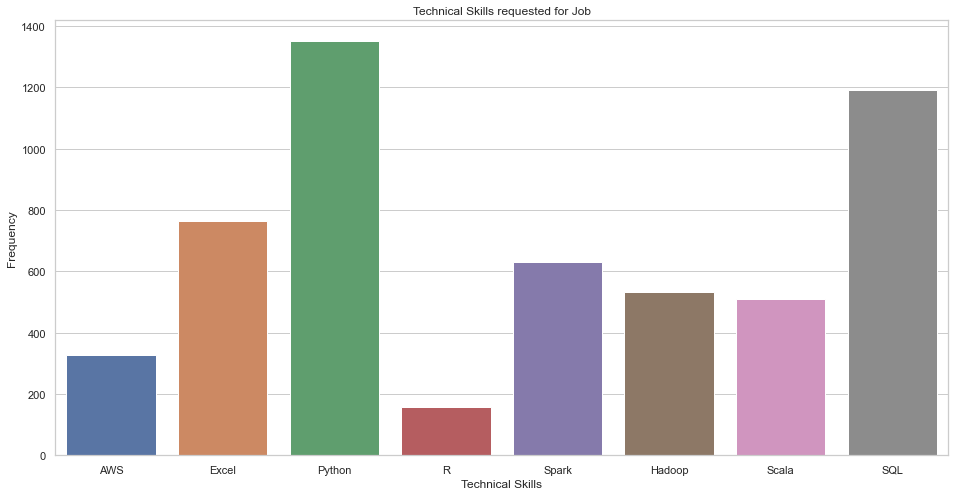

In [14]:
# Creating barplot representing the values in the dataframe
sns.set(style="whitegrid")
sns_plot = sns.barplot(x="Technical Skills", y="Frequency", data=df_technical_skill).set_title(
    'Technical Skills requested for Job')
sns.set(rc={'figure.figsize': (16, 8)})
sns_plot.figure.savefig("Technical Skills requested for Job.png")

**Findings:** As I expected Python was the most requested skillset that employer wanted prospective hires to have, it's closely followed by SQL. Big data platforms such as Apache Spark and Hadoop alongside Scala are relatively high in demand as well.
<br> I was very surprise to see that R was not highly requested in the technology industry but I postulate that R is used greater in academic circles.

<a id = "point_3_5"></a>
### 3.5 Academic Skills
On top of the technical skills that are required for the technology jobs, there's an importance of academic skills with the heavy use of mathematical concepts in this industry. I'll search through the job description and find the academic skillset that companies are looking forwards.

In [15]:
# Creating dictionary counting the number of times a particular academic skill is called
academic_skills = ['Calculus', 'Database Management',
                   'Machine Learning', 'Statistics', 'DevOps']
adict1 = {}
for every_skill in academic_skills:
    that_sum = df[every_skill].sum()
    adict1[every_skill] = that_sum

In [16]:
# Representing these numbers with a dataframe
df_academic_skill = DataFrame(list(adict1.items()), columns=[
                              'Academic Skills', 'Frequency'])
df_academic_skill

,Academic Skills,Frequency
0,Calculus,0
1,Database Management,24
2,Machine Learning,1047
3,Statistics,24
4,DevOps,85


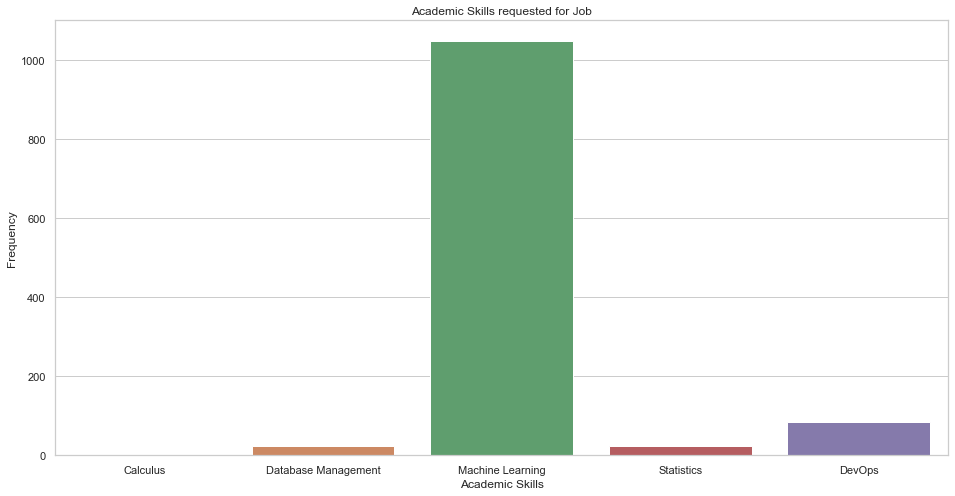

In [17]:
# Creating barplot representing the values in the dataframe
sns.set(style="whitegrid")
sns_plot = sns.barplot(x="Academic Skills", y="Frequency", data=df_academic_skill).set_title(
    'Academic Skills requested for Job')
sns.set(rc={'figure.figsize': (16, 8)})
sns_plot.figure.savefig("Academic Skills requested for Job.png")

**Findings:** Unsurprinsingly, the top academic skill set looked for by employers is Machine Learning with predictive analysis. However other academic skills sets such as DevOps, Statistics and Database Management is actually rarely mention, and Calculus was not mention at all. 
<br> I postulate that many employers believe that these skills should be instilled into them during their academic training. Therefore, in the next sub-section, I'll investigate the education level that employers expect.

<a id = "point_3_6"></a>
### 3.6 Education Level
Education is a big part of our lives, and I would want to know what education levels are they looking for.

In [18]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Job Description', 'Rating', 'Company Name',
       'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Seniority', 'AWS', 'Excel', 'Python', 'R',
       'Spark', 'Hadoop', 'Scala', 'SQL', 'Calculus', 'Database Management',
       'Machine Learning', 'Statistics', 'DevOps', 'Bachelors Degreee',
       'Masters', 'PhD', 'No Education Specified'],
      dtype='object')

In [19]:
# Creating dictionary counting the number of times a particular Education Level is called
education_level = ['Bachelors Degreee', 'Masters','PhD', 'No Education Specified']
adict2 = {}
for every_level in education_level:
    that_sum = df[every_level].sum()
    adict2[every_level] = that_sum
adict2

{'Bachelors Degreee': 1035,
 'Masters': 232,
 'PhD': 299,
 'No Education Specified': 299}

In [20]:
df_education_level = DataFrame(list(adict2.items()), columns=[
                              'Education Level', 'Frequency'])
df_education_level

,Education Level,Frequency
0,Bachelors Degreee,1035
1,Masters,232
2,PhD,299
3,No Education Specified,299


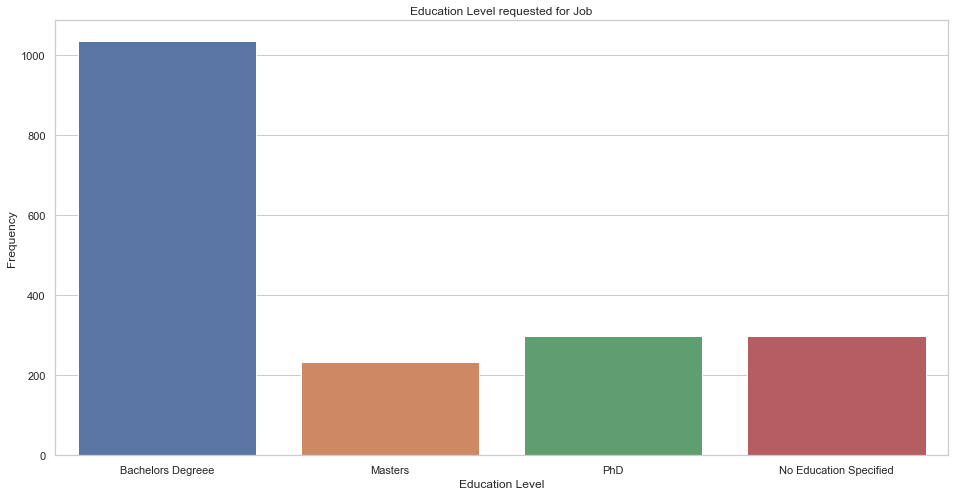

In [21]:
# Creating barplot representing the values in the dataframe
sns.set(style="whitegrid")
sns_plot = sns.barplot(x="Education Level", y="Frequency", data=df_education_level).set_title(
    'Education Level requested for Job')
sns.set(rc={'figure.figsize': (16, 8)})
sns_plot.figure.savefig("Minimum Education Level required.png")

**Findings:** I found that most jobs posting for data-driven jobs look for hires with Bachelors Degree. However, it can be noted that there's a sizeable numbers of employers looking for masters and PhD level of qualification.  There's a sizeable portion of employers who do not specify university level of qualification either as they do not require a university qualification or they omitted the education level in the Job Description.

<a id = "point_3_7"></a>
### 3.7 Job demand by Ownership
Data related jobs are on the rise, but I want to investigate where this demand for jobs are at. 
<br> Methodology: To represent the job demand by Ownership, I'll use the Treemap graph to visualize the results.

In [22]:
# We drop the rows with null values and count the number of jobs by type of ownership
df_ownership = df[df['Type of ownership'] != '-1']
df_ownership = df_ownership['Type of ownership'].value_counts(
).rename_axis('Ownership').reset_index(name='Number of Jobs')

In [23]:
# Specific number of jobs by the different ownership
df_ownership

,Ownership,Number of Jobs
0,Company - Private,815
1,Company - Public,503
2,Government,258
3,Subsidiary or Business Segment,33
4,College / University,16
5,Unknown,9
6,Contract,9


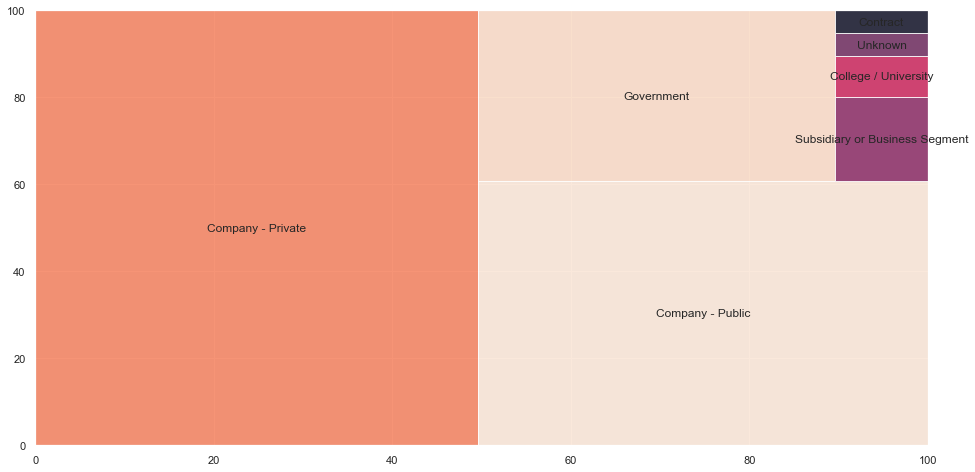

<Figure size 1152x576 with 0 Axes>

In [24]:
# Creating the Tree Map Visualisation
squarify.plot(sizes=df_ownership['Number of Jobs'],
              label=df_ownership['Ownership'], alpha=.8)
plt.show()
plt.savefig('Job demand by Ownership.png')

**Findings:** We found that by ownership, the biggest hire of data driven jobs is the private sector. Followed by public companies and government firms. This is not surprising that private and public company are the biggest players, as they are profit driven and would want to capitalise on new technology and skill set that can help to streamline their operations.

<a id = "point_3_8"></a>
### 3.8 Job demand by Industry
Data related jobs are on the rise, but I want to investigate where this demand for jobs are at. 
<br> Methodology: To represent the job demand by industry, I'll use the Treemap graph to visualize the results.

In [25]:
# We drop the rows with null values and count the number of jobs by industry
df_industry = df[df['Industry'] != '-1']
df_industry = df_industry['Industry'].value_counts().rename_axis(
    'Industry').reset_index(name='Number of Jobs')

In [26]:
# Specific number of jobs by the different industry
df_industry

,Industry,Number of Jobs
0,Government Agencies,264
1,Internet,159
2,Staffing & Outsourcing,112
3,Banks & Building Societies,102
4,IT Services,83
5,Investment Banking & Asset Management,73
6,Consulting,64
7,Computer Hardware & Software,50
8,Enterprise Software & Network Solutions,43
9,Other Retail Shops,27


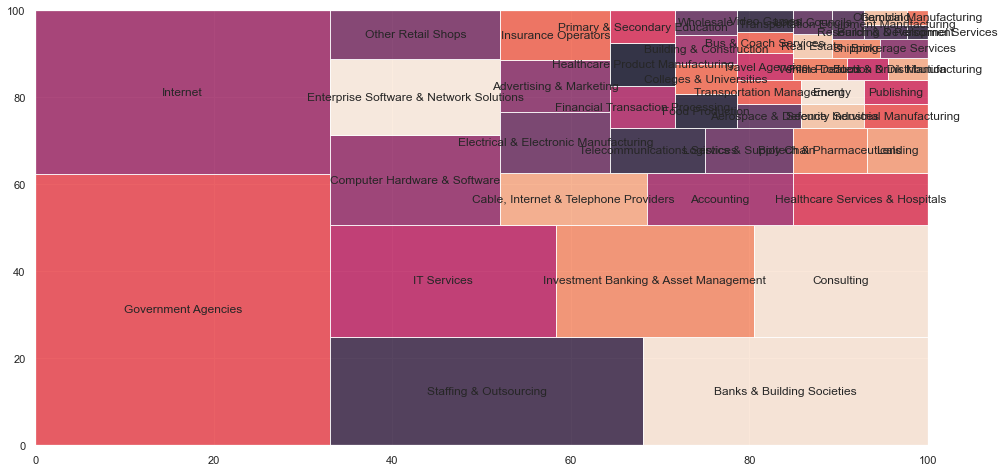

<Figure size 1152x576 with 0 Axes>

In [27]:
# Creating the Tree Map Visualisation
squarify.plot(sizes=df_industry['Number of Jobs'],
              label=df_industry['Industry'], alpha=.8)
plt.show()
plt.savefig('Job demand by Industry.png')

**Findings:** I was surprised to find that Government Agencies was the largest employer of the data driven jobs. The second largest employer by Industry is unsurprisingly is the Internet(Technology) Industry.
<br> Other surprising results was the Banking and Asset Management Industry.

<a id = "point_3_9"></a>
### 3.9 Rating Distribution
We want to investigate the distribution of company rating across in this technology industry.

In [28]:
# Removing null value for ratings
df_rating = df[df['Rating'] != -1]

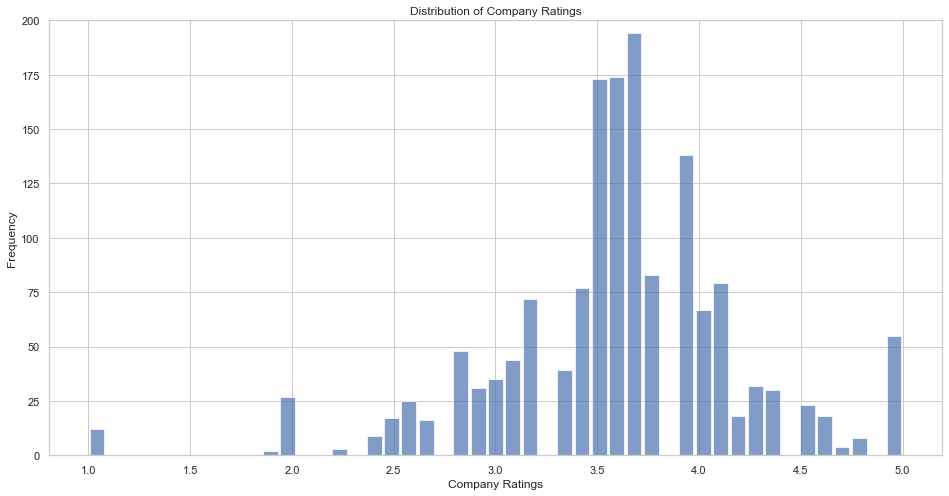

In [29]:
sns.set(style="whitegrid")
n, bins, patches = plt.hist(x=df_rating['Rating'], bins='auto',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('Company Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Company Ratings')

# Set a clean upper y-axis limit.
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.savefig('Rating Distribution.png')

**Findings:** We find that the average company rating in the technology sector is around 3.75/5.

<a id ='point_4'></a>
## Word Cloud in Job Description
We want to visualise what are the words that are most frequently repeated in the job description, we use a word cloud algorithm to represent the results below.

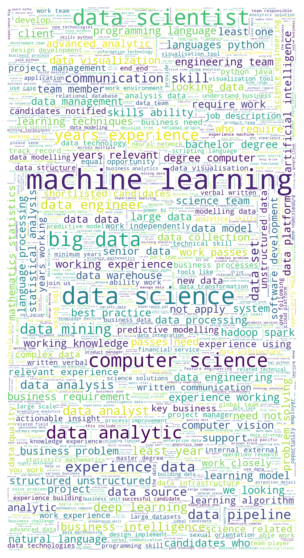

In [30]:
words = " ".join(df['Job Description'])


def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])
wc = WordCloud(background_color="white", random_state=1,
               stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
wc.generate(text)
plt.figure(figsize=[10, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
wc.to_file('Job Description Word Cloud.png')

**Findings:** In the job description, we find that the knowledge in machine learning is the most popular skill that is requested by employers. Other notable skills are data mining, predicitve modeling, data pipline, natural language processing and big data.